## 第1章　数学的準備
### 1.1 曲線と曲面
#### 1.1.1 曲線の方程式

In [67]:
function generateEllipse(a, b)
  t = range(0, 2 * pi, length=100)   
  f(x,y) = x^2/a^2+y^2/b^2-1
  x = a*cos.(t)
  y = b*sin.(t)
  x, y, f
end

generateEllipse (generic function with 1 method)

In [68]:
xs=range(-4,4,length=25)
ys=range(-3,3,length=25)

-3.0:0.25:3.0

In [69]:
using PyPlot

In [70]:
X, Y = [x for y in ys, x in xs], [y for y in ys, x in xs];

In [71]:
x,y, f = generateEllipse(3,2);

In [72]:
xy_mesh = hcat(reshape(X,length(X),1),reshape(Y,length(Y),1));

##### 例題1.1

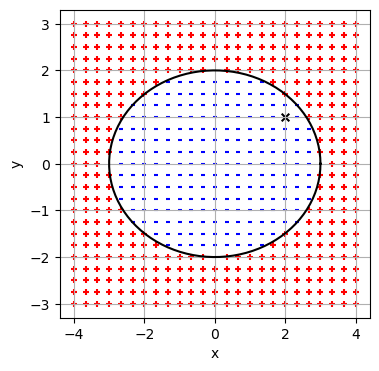

PyObject Text(24.0, 0.5, 'y')

In [75]:
fig, ax = subplots(figsize=(4,4))

ax.scatter(X[f.(xs',ys).<0], Y[f.(xs',ys).<0],c="b",marker="_",s=5)
ax.scatter(X[f.(xs',ys).>0], Y[f.(xs',ys).>0],c="r",marker="+",s=20)
ax.scatter(2, 1, c="k",marker="x",s=30)
ax.grid()
ax.plot(x,y, c="k")
ax.set_xlabel("x")
ax.set_ylabel("y")

### 1.1.2 曲線の法線ベクトル

In [202]:
using ForwardDiff

In [203]:
∇f = hcat([ForwardDiff.gradient(v->f(v[1],v[2]),[xx,yy]) for (xx, yy) in zip(x,y)]);

In [196]:
∇f[70],x[70],y[70]

([-0.21804530887828127, -0.9450008187146683], -0.9812038899522657, -1.8900016374293367)

In [197]:
size(f_grad)

(100, 1)

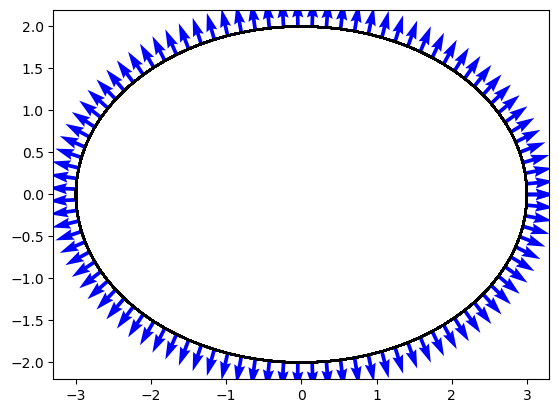

In [200]:
fig, ax = subplots()
for (xx,yy,g) in zip(x,y,∇f)
    ax.plot(x,y, c="k")
    ax.quiver(xx, yy, g[1], g[2],color="b")
end

#### 例題1.2, 例題1.3

In [210]:
f_1dim(x, y,A, B, C)=x*A + y*B +  C

f_1dim (generic function with 1 method)

In [208]:
A=3
B=2
C=1;

In [217]:
∇f_1dim=ForwardDiff.gradient(v-> f_1dim(v[1],v[2],A,B,C),[2,3])

2-element Array{Int64,1}:
 3
 2

In [213]:
y_1dim(x) = (-x*A-C)/B

y_1dim (generic function with 2 methods)

In [223]:
xs[1], ys[1]

(-4.0, -3.0)

In [228]:
∇f_1dim[1]

3

In [ ]:
xs[50]

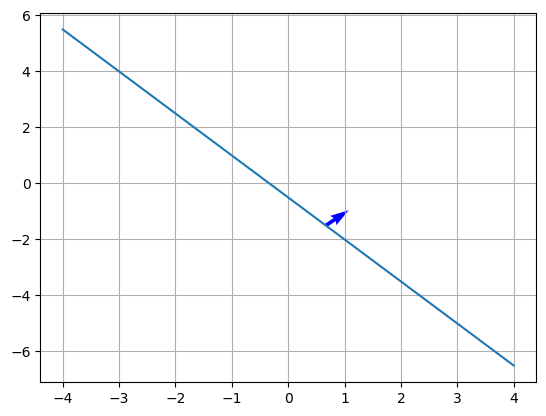

In [232]:
fig, ax = subplots()
ax.plot(xs, y_1dim.(xs))
ax.quiver(xs[15], y_1dim(xs[15]), ∇f_1dim[1], ∇f_1dim[2],color="b")
ax.grid()

#### 例題1.4

In [234]:
y_2dim(x) = 2x^2+3x-1
f_2dim(x,y) = y -y_2dim(x)

f_2dim (generic function with 1 method)

In [235]:
∇f_2dim = ForwardDiff.gradient(v-> f_2dim(v[1],v[2]),[1,4])

2-element Array{Int64,1}:
 -7
  1

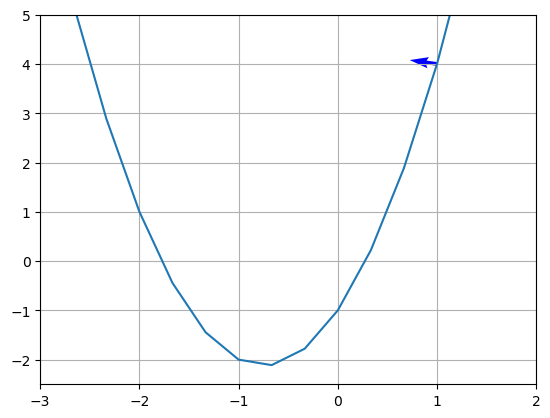

In [245]:
fig, ax = subplots()
ax.plot(xs, y_2dim.(xs))
ax.set_xlim([-3,2])
ax.set_ylim([-2.5,5])
ax.quiver(1, 4, ∇f_2dim[1], ∇f_2dim[2],color="b")
ax.grid()

3次元でも基本同じー

## 1.2 1次形式と2次形式
### 1.2.1 1次形式

In [258]:
a = range(1,10,length=10)
x = range(10,20,length=10)
f_lf(a,x) = sum([ aa*xx for (aa, xx) in zip(a,x)])

f_lf (generic function with 1 method)

In [259]:
∇f_lf = ForwardDiff.gradient(v->f_lf(a,v), x)

10-element Array{Float64,1}:
  1.0
  2.0
  3.0
  4.0
  5.0
  6.0
  7.0
  8.0
  9.0
 10.0

In [263]:
if (∇f_lf==a)
    println("∇(a, x)=a")
end

∇(a, x)=a


### 1.2.2 2次形式

In [280]:
f_qf(A,x) = x'*A*x

f_qf (generic function with 1 method)

In [281]:
x = [1 ;2]

2-element Array{Int64,1}:
 1
 2

In [282]:
A = [3 4;5 6]

2×2 Array{Int64,2}:
 3  4
 5  6

In [283]:
A*x

2-element Array{Int64,1}:
 11
 17

### 1.2.3 2次形式の微分

In [285]:
A= [4 1 3;
    1 3 2;
    3 2 5]

3×3 Array{Int64,2}:
 4  1  3
 1  3  2
 3  2  5

#### 例題1.20

In [287]:
ForwardDiff.gradient(v->f_qf(A,v),[1,1,1])

3-element Array{Int64,1}:
 16
 12
 20

### 1.2.4 双1次形式

## 1.3 2次形式の標準形
### 1.3.1 固有値と固有ベクトル

#### 例題1.23
例題1.23と共に、性質を確かめてく

In [289]:
using LinearAlgebra

In [330]:
A=[6 2;
  2 3]
λ₁=2
u₁=[1;
    -2]./sqrt(5)
λ₂=7
u₂=[2;
    1]./sqrt(5)

2-element Array{Float64,1}:
 0.8944271909999159
 0.4472135954999579

In [331]:
Matrix(I, 2, 2)

2×2 Array{Bool,2}:
 1  0
 0  1

In [332]:
det(λ₁*I-A)

0.0

### 1.3.2 対称行列の対角化

In [364]:
u₁ = reshape(u₁,(2,1))
u₂ = reshape(u₂,(2,1))

2×1 Array{Float64,2}:
 0.8944271909999159
 0.4472135954999579

In [367]:
U=hcat(u₁,u₂)

2×2 Array{Float64,2}:
  0.447214  0.894427
 -0.894427  0.447214

In [368]:
U'*U

2×2 Array{Float64,2}:
 1.0  0.0
 0.0  1.0

In [341]:
A*U

2×2 Array{Float64,2}:
  0.894427  6.26099
 -1.78885   3.1305

In [360]:
Aui=A*u₁,A*u₂

([0.894427190999916, -1.788854381999832], [6.260990336999411, 3.1304951684997055])

In [371]:
λui=hcat(λ₁*u₁,λ₂*u₂)

2×2 Array{Float64,2}:
  0.894427  6.26099
 -1.78885   3.1305

In [372]:
λ=[λ₁ 0;
 0 λ₂;]

2×2 Array{Int64,2}:
 2  0
 0  7

In [373]:
Uλ=U*λ

2×2 Array{Float64,2}:
  0.894427  6.26099
 -1.78885   3.1305

In [374]:
U'*A*U

2×2 Array{Float64,2}:
 2.0  0.0
 0.0  7.0

### 1.3.3 2次形式の標準化

### 1.3.4 正値対称行列
### 1.3.5 正値2次形式